# IMC Data Notebook

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

file_input = r"C:\Users\alber\Downloads\round-1-island-data-bottle\prices_round_1_day_0.csv"
data = pd.read_csv(file_input, sep = ";")

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
7,0,300,AMETHYSTS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,0.0
8,0,400,AMETHYSTS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
19993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
19994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


<Axes: xlabel='timestamp'>

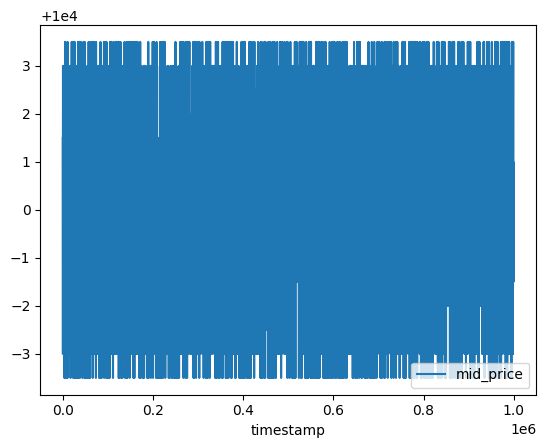

In [89]:
amethysts_data = data[data["product"] == 'AMETHYSTS'].copy()
starfruit_df = data[data["product"] == 'STARFRUIT'].copy()

display(amethysts_data)
amethysts_data.plot(x='timestamp', y='mid_price')

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,0,0,STARFRUIT,5036,30,0.0,0.0,0.0,0.0,5043,30,0.0,0.0,0.0,0.0,5039.5,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,0.0,0.0,0.0,0.0,5042.0,0.0
5,0,200,STARFRUIT,5037,1,5036.0,21.0,0.0,0.0,5043,1,5044.0,21.0,0.0,0.0,5040.0,0.0
6,0,300,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5044,25,0.0,0.0,0.0,0.0,5040.5,0.0
9,0,400,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5042,6,5044.0,25.0,0.0,0.0,5039.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,28,0.0,0.0,0.0,0.0,5052.5,0.0
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,29,0.0,0.0,0.0,0.0,5051.0,0.0
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,2,5055.0,24.0,0.0,0.0,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,1,5054.0,27.0,0.0,0.0,5049.5,0.0


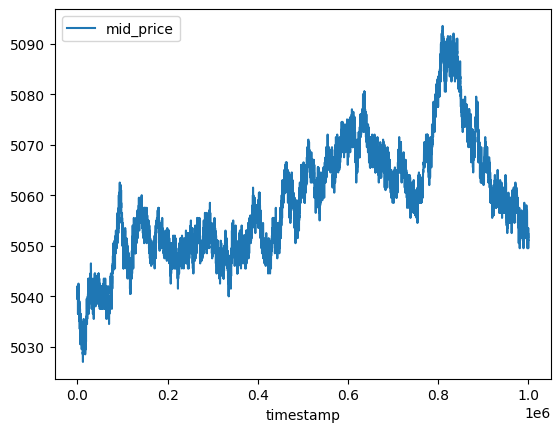

In [90]:
starfruit_df.fillna(0, inplace=True)
starfruit_df.plot(x='timestamp', y='mid_price')
display(starfruit_df)

In [130]:
rolling_window = 10
starfruit_df['mid_price_ma5'] = starfruit_df['mid_price'].rolling(window=rolling_window).mean()
train_size = int(len(starfruit_df) * 0.8)
train_df = starfruit_df[:train_size]
test_df = starfruit_df[train_size:]

starfruit_df.fillna(0, inplace=True)
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_price_ma5
1,0,0,STARFRUIT,5036,30,0.0,0.0,0.0,0.0,5043,30,0.0,0.0,0.0,0.0,5039.5,0.0,0.00
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,0.0,0.0,0.0,0.0,5042.0,0.0,0.00
5,0,200,STARFRUIT,5037,1,5036.0,21.0,0.0,0.0,5043,1,5044.0,21.0,0.0,0.0,5040.0,0.0,0.00
6,0,300,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5044,25,0.0,0.0,0.0,0.0,5040.5,0.0,0.00
9,0,400,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5042,6,5044.0,25.0,0.0,0.0,5039.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,28,0.0,0.0,0.0,0.0,5052.5,0.0,5052.50
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,29,0.0,0.0,0.0,0.0,5051.0,0.0,5052.25
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,2,5055.0,24.0,0.0,0.0,5053.5,0.0,5052.35
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,1,5054.0,27.0,0.0,0.0,5049.5,0.0,5051.95


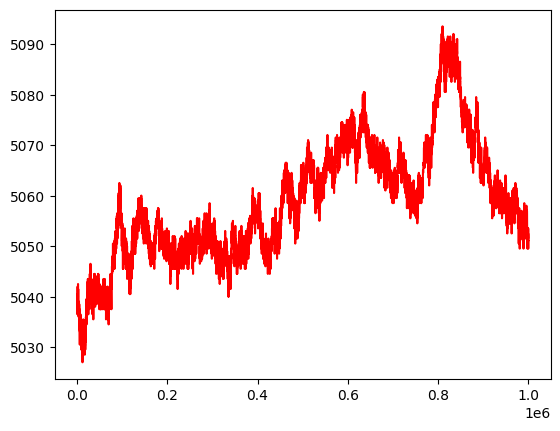

In [131]:
plt.plot(starfruit_df['timestamp'][rolling_window:], starfruit_df['mid_price'][rolling_window:], "red")
plt.show()

In [132]:
from sklearn.linear_model import LinearRegression

# Train model for Starfruit
X_train_starfruit = train_df[['mid_price', 'mid_price_ma5']]
y_train_starfruit = train_df['mid_price']
model_starfruit = LinearRegression()
model_starfruit.fit(X_train_starfruit, y_train_starfruit)

LinearRegression()

In [133]:
train_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_price_ma5
1,0,0,STARFRUIT,5036,30,0.0,0.0,0.0,0.0,5043,30,0.0,0.0,0.0,0.0,5039.5,0.0,0.00
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,0.0,0.0,0.0,0.0,5042.0,0.0,0.00
5,0,200,STARFRUIT,5037,1,5036.0,21.0,0.0,0.0,5043,1,5044.0,21.0,0.0,0.0,5040.0,0.0,0.00
6,0,300,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5044,25,0.0,0.0,0.0,0.0,5040.5,0.0,0.00
9,0,400,STARFRUIT,5037,25,0.0,0.0,0.0,0.0,5042,6,5044.0,25.0,0.0,0.0,5039.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15990,0,799500,STARFRUIT,5077,25,0.0,0.0,0.0,0.0,5084,25,0.0,0.0,0.0,0.0,5080.5,0.0,5080.30
15993,0,799600,STARFRUIT,5082,7,5078.0,8.0,5077.0,30.0,5084,31,0.0,0.0,0.0,0.0,5083.0,0.0,5080.50
15995,0,799700,STARFRUIT,5078,1,5077.0,29.0,0.0,0.0,5084,1,5085.0,29.0,0.0,0.0,5081.0,0.0,5080.40
15997,0,799800,STARFRUIT,5077,20,0.0,0.0,0.0,0.0,5085,20,0.0,0.0,0.0,0.0,5081.0,0.0,5080.75


In [134]:
test_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_price_ma5
16001,0,800000,STARFRUIT,5082,1,5077.0,30.0,0.0,0.0,5084,30,0.0,0.0,0.0,0.0,5083.0,0.0,5080.55
16003,0,800100,STARFRUIT,5078,2,5077.0,23.0,0.0,0.0,5084,25,0.0,0.0,0.0,0.0,5081.0,0.0,5080.80
16005,0,800200,STARFRUIT,5083,1,5078.0,4.0,5077.0,25.0,5084,25,0.0,0.0,0.0,0.0,5083.5,0.0,5081.15
16006,0,800300,STARFRUIT,5077,27,0.0,0.0,0.0,0.0,5084,27,0.0,0.0,0.0,0.0,5080.5,0.0,5081.15
16009,0,800400,STARFRUIT,5077,29,0.0,0.0,0.0,0.0,5082,8,5084.0,29.0,0.0,0.0,5079.5,0.0,5081.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,28,0.0,0.0,0.0,0.0,5052.5,0.0,5052.50
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,29,0.0,0.0,0.0,0.0,5051.0,0.0,5052.25
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,2,5055.0,24.0,0.0,0.0,5053.5,0.0,5052.35
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,1,5054.0,27.0,0.0,0.0,5049.5,0.0,5051.95


In [135]:
X_test_starfruit = test_df[['mid_price', 'mid_price_ma5']]
y_test_starfruit = test_df['mid_price']
y_pred_starfruit = model_starfruit.predict(X_test_starfruit)
rmse_starfruit = np.sqrt(mean_squared_error(y_test_starfruit, y_pred_starfruit))
r2_starfruit = r2_score(y_test_starfruit, y_pred_starfruit)
print(f"Starfruit - RMSE: {rmse_starfruit:.2f}, R-squared: {r2_starfruit:.2f}")

Starfruit - RMSE: 0.00, R-squared: 1.00


In [136]:
rmse_starfruit

6.43431345663848e-13